<a href="https://colab.research.google.com/github/wolfsbane9513/Android-Lib-VerticalMarqueeTextView/blob/master/Colab_4_Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Installing dependencies and notebook gpu setup

In [1]:
!pip install tensorflow-gpu==2.0.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4e6ece1bbf66217d04dc4ca15331053054d661f73ea859b40d85b768859a17de
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstal

## Step 2: Importing the libraries

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0'

## Step 3: Data Preprocessing

### Loading the Cifar10 dataset

In [0]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [0]:
X_train = X_train / 255.0

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

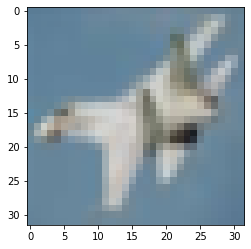

In [30]:
plt.imshow(X_test[10])

## Step 4: Building a Convolutional Neural Network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size: 3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolutional layer and the max-pooling layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolutional layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth convolutional layer and max-pooling layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

### Adding the output layer

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [44]:
model.fit(X_train, y_train, epochs=15)

Train on 50000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 205us/sample - loss: 1.6053 - sparse_categorical_accuracy: 0.4091
Epoch 2/15
50000/50000 [==============================] - 10s 194us/sample - loss: 1.1585 - sparse_categorical_accuracy: 0.5876
Epoch 3/15
50000/50000 [==============================] - 10s 195us/sample - loss: 0.9512 - sparse_categorical_accuracy: 0.6656
Epoch 4/15
50000/50000 [==============================] - 10s 194us/sample - loss: 0.8305 - sparse_categorical_accuracy: 0.7110
Epoch 5/15
50000/50000 [==============================] - 10s 192us/sample - loss: 0.7323 - sparse_categorical_accuracy: 0.7444
Epoch 6/15
50000/50000 [==============================] - 10s 195us/sample - loss: 0.6617 - sparse_categorical_accuracy: 0.7690
Epoch 7/15
50000/50000 [==============================] - 10s 197us/sample - loss: 0.5987 - sparse_categorical_accuracy: 0.7888
Epoch 8/15
50000/50000 [==============================] - 10s 194us/sample - loss

### Evaluating the model

In [45]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [46]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.737500011920929
